<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 1</h2></center>
<center><h3>Fundamentos</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Diego Rodriguez</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
 

## 1. Crea tu perfil y un repositorio para las actividades del curso en Github
<p align="justify">
Tanto en el mercado laboral como a nivel de investigación científica, se ha normalizado el uso de herramientas de desarrollo continuo (CI/CD), entre las que se cuenta a GitHub. 

<p align="justify">
Debes crear tu cuenta y primer repositorio en GitHub. 

El respositorio deberá tener un archivo README y subcarpetas para las actividades del semestre. Allí deberás alojar el archivo de Jupyter Notebook con el código y todos los recursos para la posterior revisión de tu trabajo.
    
Este medio será el canal de entrega de tus actividades cada semana, de tal forma que al final del curso debes tener un portafolio de tu trabajo para presentar a tus colegas o en la industria.
    
    

In [11]:
# Usuario: diegorodpucv
# Enlace al repositorio para trabajos: https://github.com/diegorodpucv/eie401

## 2. Define en python vectores y funciones
<p align="justify">
Debes generar vectores que representan intervalos de tiempo o de una variable.
Debes ingresar las funciones matemáticas y evaluarlas en los vectores generados.

$$
f(x) =  e^{-x^2} 
$$

$$
f(z) =  ysin(x) 
$$

<p align="justify">
Haz una gráfica para cada uno de las funciones evaluadas.
    
    

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Importamos las librerías correspondientes

In [17]:
m = 0.001 #Muestreo
inicio = -6
fin = inicio * -1
npTime = np.arange(start=inicio,stop=fin,step=m)
fn = np.power(npTime, 2)
fn1 = np.exp(-fn)


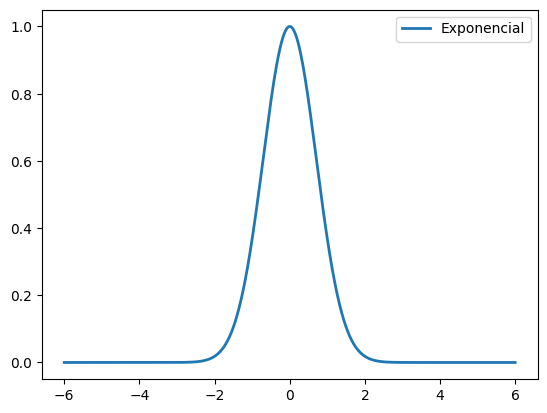

In [18]:
plt.plot(npTime,fn1,linewidth=2,label="Exponencial")
plt.legend()
plt.show()

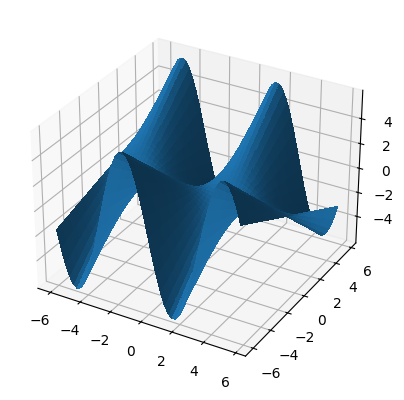

In [27]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X = np.arange(-6, 6, 0.25)
Y = np.arange(-6, 6, 0.25)
X, Y = np.meshgrid(X, Y)
Z = Y * np.sin(X)
surf = ax.plot_surface(X, Y, Z, linewidth=0, antialiased=False)
plt.show()

## 3. Ruido
<p align="justify">
Crear una señal (senoidal, cosenoidal, etc) y demuestra la agregación de ruido.
    


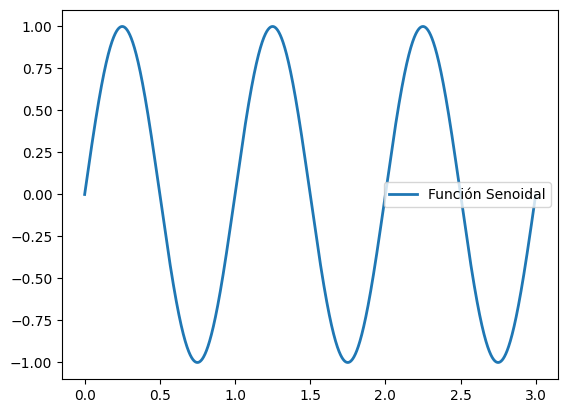

In [29]:
m = 0.001 #Muestreo
npTime        = np.arange(start=0,stop=3,step=m)
fnseno       = np.sin(2*np.pi*npTime)
plt.plot(npTime,fnseno,linewidth=2,label="Función Senoidal")
plt.legend()
plt.show()

### 3.1 Ruido Gaussiano
Debes agregar la señal de ruido a la que creaste previamente. Adicionalmente, debes mostrar una gráfica con el resultado.


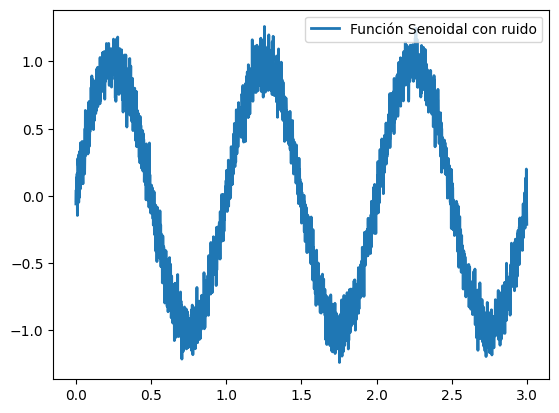

In [31]:
ruido = 0.1*np.random.randn(len(npTime))
senalruido = ruido + fnseno
plt.plot(npTime,senalruido,linewidth=2,label="Función Senoidal con ruido")
plt.legend()
plt.show()

### 3.2 Ruido Rosa
Investiga en que consiste el ruido rosa, cual es la diferencia del ruido gaussiano y demuéstralo.

El ruido rosa consiste en una señal aleatoria en la que la energía por banda de frecuencia es constante, lo que significa que tiene una densidad espectral de potencia constante por octava o por tercio de octava, se caracteriza por tener una disminución de aproximadamente 3 decibelios por octava en su densidad espectral de potencia a medida que la frecuencia aumenta.
En cambio, el ruido gaussiano o ruido blanco es un tipo de señal aleatoria en la que las muestras están distribuidas según una distribución normal donde cada muestra es independiente y tiene una distribución normal con una media y una desviación estándar específicas.

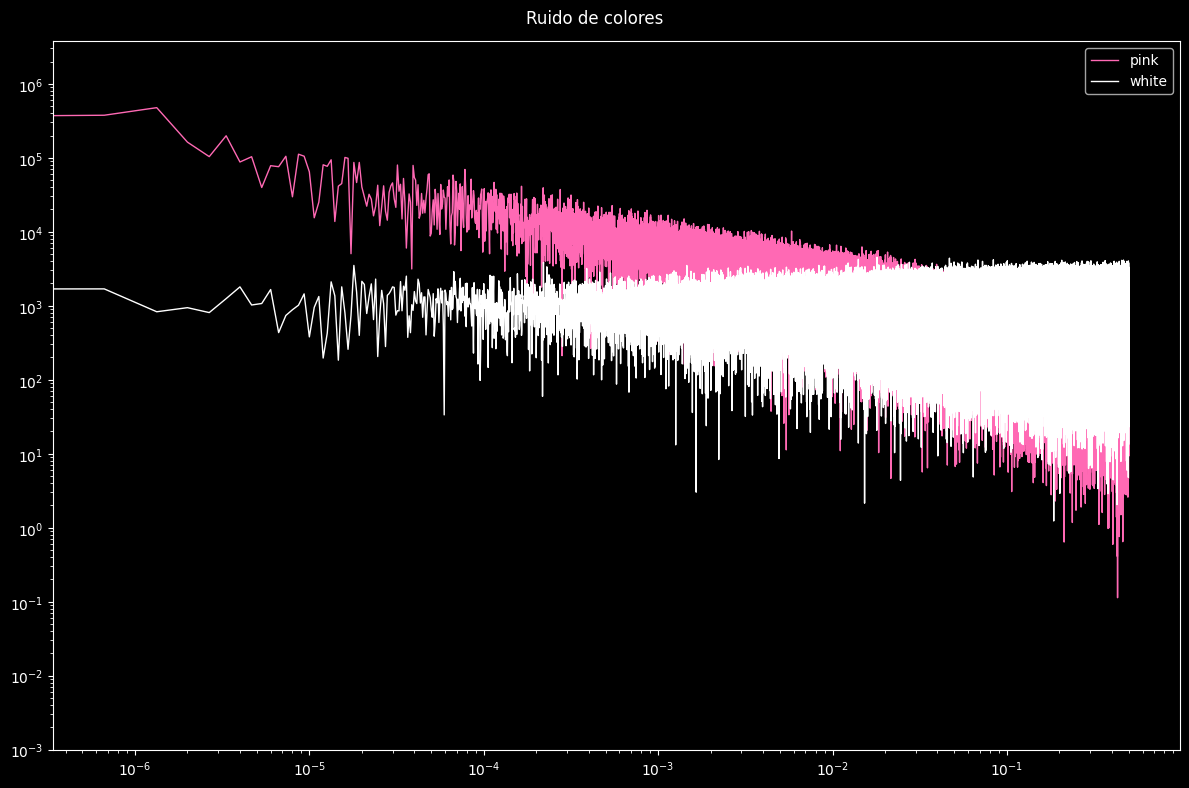

In [50]:
def plot_spectrum(s):
    f = np.fft.rfftfreq(len(s))
    return plt.loglog(f, np.abs(np.fft.rfft(s)))[0]

def noise_psd(N, psd = lambda f: 1):
        X_white = np.fft.rfft(np.random.randn(N));
        S = psd(np.fft.rfftfreq(N))
        # Normalize S
        S = S / np.sqrt(np.mean(S**2))
        X_shaped = X_white * S;
        return np.fft.irfft(X_shaped);

def PSDGenerator(f):
    return lambda N: noise_psd(N, f)

@PSDGenerator
def white_noise(f):
    return 1;

@PSDGenerator
def pink_noise(f):
    return 1/np.where(f == 0, float('inf'), np.sqrt(f))

plt.style.use('dark_background')
plt.figure(figsize=(12, 8), tight_layout=True)
for G, c in zip(
        [pink_noise, white_noise], 
        ['hotpink','white']):
    plot_spectrum(G(30*50_000)).set(color=c, linewidth=1)
plt.legend(['pink', 'white'])
plt.suptitle("Ruido de colores");
plt.ylim([1e-3, None]);

## 4. Referencias
<p align="justify">
    
[Generate colors of noise in Python] https://stackoverflow.com/questions/67085963/generate-colors-of-noise-in-python

[Generación de señales]https://medium.com/@martinkarlsson.io/fourier-transform-in-python-f15b3243ce9a

[Fourier Transform]https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.04-FFT-in-Python.html

[SciPy] https://docs.scipy.org/doc/scipy/tutorial/fft.html

[Fourier con numpy] https://towardsdatascience.com/fourier-transform-the-practical-python-implementation-acdd32f1b96a